In [1]:
#Import important libraries
import numpy as np
from numpy import nan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime, date, time

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error 

sns.set_style("darkgrid")

In [2]:
#import dataset
df = pd.read_csv("../CSV files/kc_house_data.csv")

#### Exploring the dataset and observing some basic information

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.shape

(21613, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
df.describe(include = "all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,21613,NaN,NaN,NaN,4.5803e+09,2.87657e+09,1.0001e+06,2.12305e+09,3.90493e+09,7.3089e+09,9.9e+09
date,21613,372,20140623T000000,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,21613,NaN,NaN,NaN,540088,367127,75000,321950,450000,645000,7.7e+06
bedrooms,21613,NaN,NaN,NaN,3.37084,0.930062,0,3,3,4,33
bathrooms,21613,NaN,NaN,NaN,2.11476,0.770163,0,1.75,2.25,2.5,8
sqft_living,21613,NaN,NaN,NaN,2079.9,918.441,290,1427,1910,2550,13540
sqft_lot,21613,NaN,NaN,NaN,15107,41420.5,520,5040,7618,10688,1.65136e+06
floors,21613,NaN,NaN,NaN,1.49431,0.539989,1,1,1.5,2,3.5
waterfront,21613,NaN,NaN,NaN,0.00754176,0.0865172,0,0,0,0,1
view,21613,NaN,NaN,NaN,0.234303,0.766318,0,0,0,0,4


In [7]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [9]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [10]:
numeric_cols = df.select_dtypes(include = [np.number])
print(numeric_cols.dtypes)

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [11]:
yr_ren = df.loc[df["yr_renovated"] ==0]
yr_bul = df[df["bedrooms"]== 0]

In [12]:
df.view.value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

In [13]:
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [14]:
df.yr_built.value_counts().index.max()

2015

### Data visualization

In [15]:
print(df.bathrooms.value_counts())
df.bedrooms.value_counts()

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
8.00       2
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64


3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

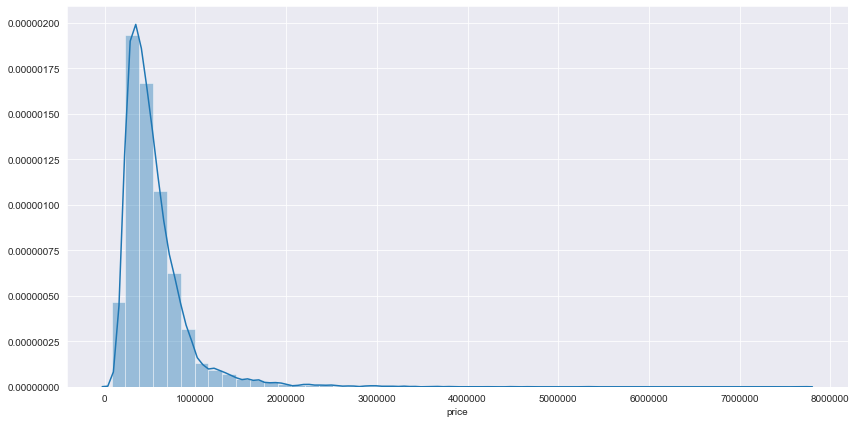

In [16]:
plt.figure(figsize = (14,7))
sns.distplot(df.price, kde = True)

In [17]:
features = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15']

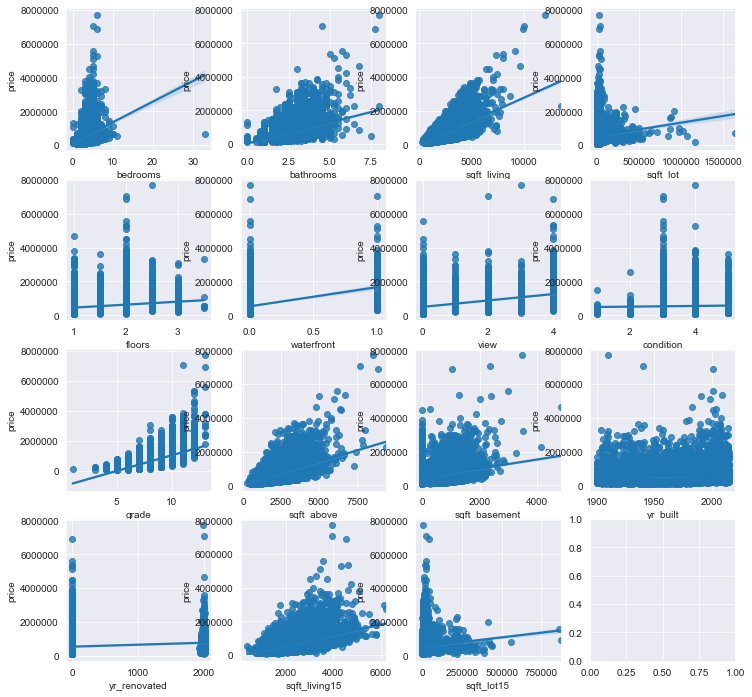

In [18]:
fig, axs = plt.subplots(nrows = 4, ncols = 4, figsize = (12,12))
for i in range(0, len(features)):
    rows = i // 4
    cols = i % 4
    ax = axs[rows,cols]
    plot = sns.regplot(x = features[i], y = "price", data = df, ax=ax)

As can be seen in the plots above, most the features selected such as bedrooms and sqft_living have a noticably positive linear relationship with the price 

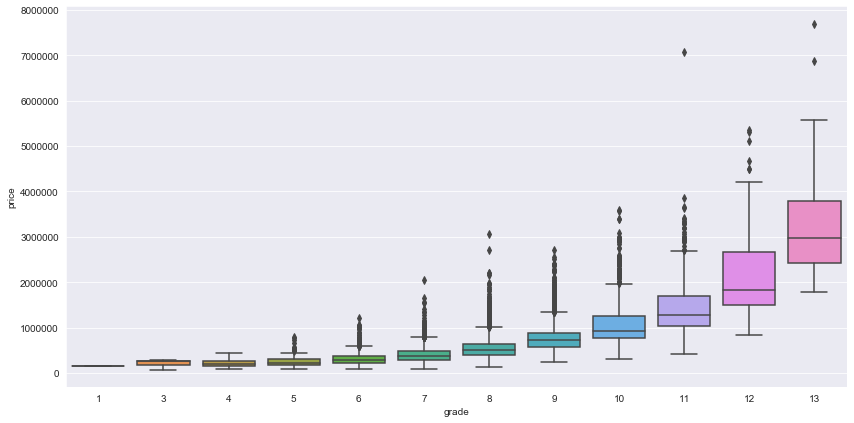

In [19]:
plt.figure(figsize = (14,7))
sns.boxplot(x = "grade", y = "price", data = df)

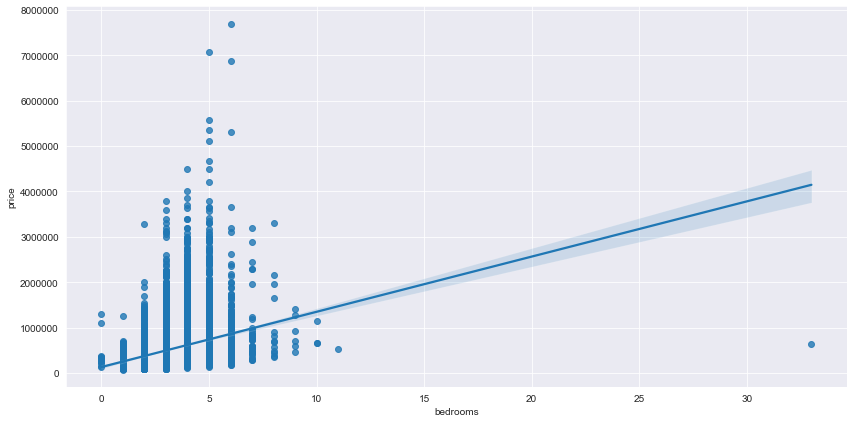

In [20]:
plt.figure(figsize = (14,7))
sns.regplot(x = "bedrooms", y = "price", data = df)

Text(0, 0.5, 'Price')

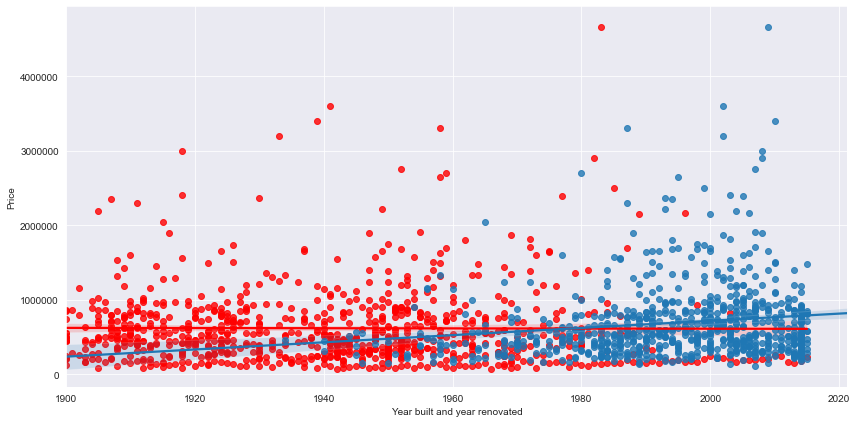

In [21]:
from numpy import nan
new_yr_renov = df.groupby(["yr_renovated", "yr_built"])["price"].min().reset_index()
new_yr_renov["yr_renovated"] = new_yr_renov["yr_renovated"].replace(0, np.nan)
plt.figure(figsize = (14,7))
sns.regplot(x = "yr_built", y = "price", data = new_yr_renov, color = "red")
sns.regplot(x = "yr_renovated", y = "price", data = new_yr_renov, truncate=False)
plt.xlabel("Year built and year renovated")
plt.ylabel("Price")

Looking at the plot above, it can be see that the year built(red) and year renovated(blue) have very little positive linear relationship with the price compared to some other features on the dataset

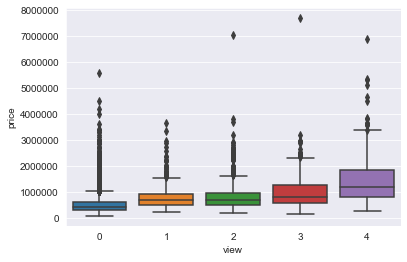

In [22]:
#sns.boxplot(x = df.waterfront, y = df.price)
sns.boxplot(x = df.view, y = df.price)

In [23]:
df["date"] = pd.to_datetime(df["date"], errors= "coerce")

In [24]:
colus = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

In [26]:
df["price"] = df["price"].apply(np.int64)
df["bedrooms"] = df["bedrooms"].apply(np.int64)
df["bathrooms"] = df["bathrooms"].apply(np.int64)
df["floors"] = df["floors"].apply(np.int64, axis=1, raw=False)

In [27]:
df["rooms"] = df["bedrooms"] + df["bathrooms"]
df["_views_n"] = df["waterfront"] + df["view"]

In [28]:
df["bedrooms"] = df["bedrooms"].replace(0, np.nan)
df["bathrooms"] = df["bathrooms"].replace(0, np.nan)
repl = ["bedrooms", "bathrooms"]
df[repl].median()
df.fillna(df[repl].median(), inplace = True)

In [29]:
cols = ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', "rooms"]
correlations = [ df['price'].corr(df[f]) for f in cols]
df_corr = pd.DataFrame({"features": cols, "correlation": correlations})
df_corr

,features,correlation
0,id,-0.016762
1,price,1.000000
2,bedrooms,0.308868
3,bathrooms,0.508961
4,sqft_living,0.702035
5,sqft_lot,0.089661
6,floors,0.237211
7,waterfront,0.266369
8,view,0.397293
9,condition,0.036362


In [30]:
def corr_plot(df, y_label):
    color='coral'
    fig = plt.gcf()
    fig.set_size_inches(20, 12)
    plt.ylabel(y_label)

    ax = df.correlation.plot(linewidth=3.3, color=color, )
    ax.set_xticks(df.index)
    ax.set_xticklabels(df.features, rotation=75);
    plt.show()

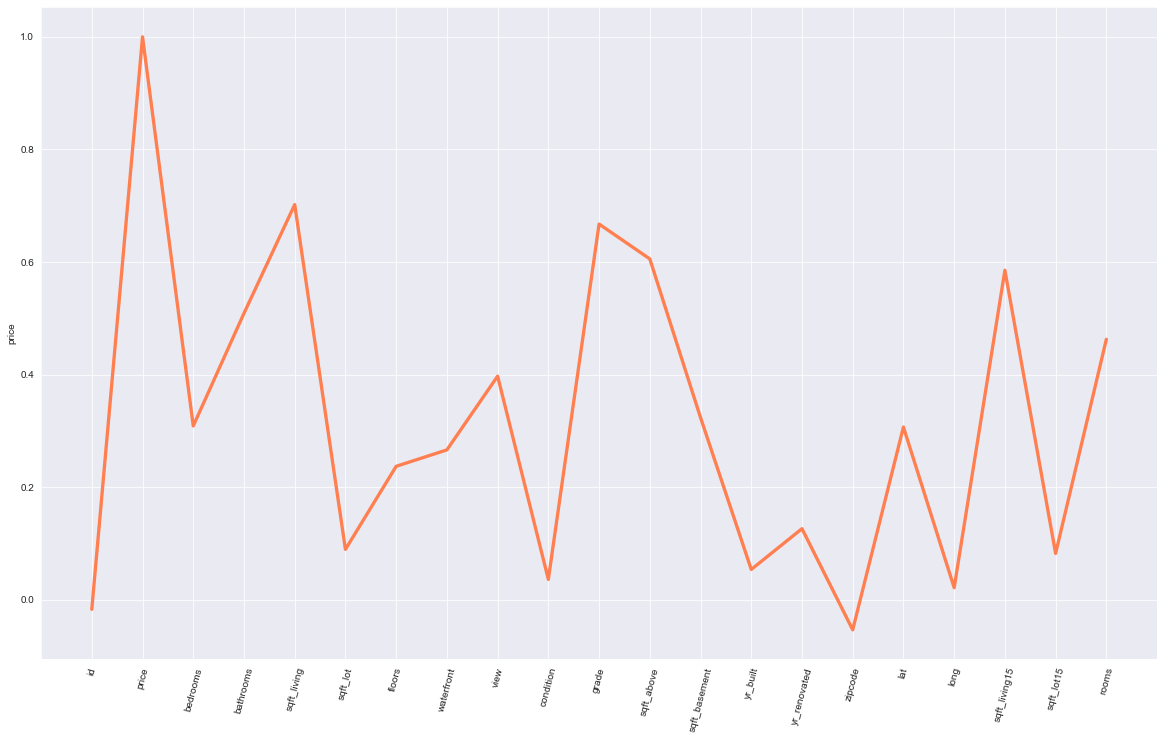

In [31]:
corr_plot(df_corr, "price")

### Building the models

In [32]:
df_n = df.drop(["price", "id", "long", "lat", "date", "yr_renovated", "bedrooms", "bathrooms", "waterfront", "view"], axis = 1)
#columns = ["rooms",'sqft_living', 'grade', 'sqft_above', 'sqft_living15', "view"]
#df_test = df[columns]

In [33]:
x = df_n
y = df["price"]
print(y.shape)
print(x.shape)

(21613,)
(21613, 13)


In [34]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.35, random_state = 10)

#### Linear regression model

In [35]:
L = LinearRegression()

In [36]:
L.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
y_pred = L.predict(X_test)

In [38]:
comp = pd.DataFrame({"Actual_value": y_test, "predicted_value": y_pred})
comp

,Actual_value,predicted_value
957,323000,4.678789e+05
14143,690000,6.100624e+05
19452,142000,-6.192670e+05
20510,560000,3.793241e+05
18354,545000,3.509953e+05
...,...,...
3084,660000,4.454628e+05
2668,1380000,1.611084e+06
20381,890000,1.125861e+06
19233,654000,6.973769e+05


In [39]:
price_mae = mean_absolute_error(y_test, y_pred)
print(price_mae)

141301.99516299236


In [40]:
print(L.score(X_test, y_test))

0.6380222629576656


#### Decision tree model

In [41]:
D = DecisionTreeRegressor(random_state=0)

In [42]:
D.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [43]:
d_pred = D.predict(X_test)
tree_comp = pd.DataFrame({"Actual_val": y_test, "Pred_val": d_pred})
tree_comp

,Actual_val,Pred_val
957,323000,289000.0
14143,690000,650000.0
19452,142000,299000.0
20510,560000,527500.0
18354,545000,511718.0
...,...,...
3084,660000,500000.0
2668,1380000,1350000.0
20381,890000,909500.0
19233,654000,539950.0


In [44]:
price_mae = mean_absolute_error(y_test, d_pred)
print(price_mae)
print(D.score(X_test, y_test))

122050.01083939194
0.6441005411676572


In [45]:
def get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(X_train, y_train)
    preds_val = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds_val)
    return(mae)

In [57]:
for max_leaf_nodes in [550, 555, 565, 655, 755, 855, 955, 1000]:
    best_mae = get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, best_mae))

Max leaf nodes: 550  		 Mean Absolute Error:  112279
Max leaf nodes: 555  		 Mean Absolute Error:  112221
Max leaf nodes: 565  		 Mean Absolute Error:  112284
Max leaf nodes: 655  		 Mean Absolute Error:  111877
Max leaf nodes: 755  		 Mean Absolute Error:  111814
Max leaf nodes: 855  		 Mean Absolute Error:  112860
Max leaf nodes: 955  		 Mean Absolute Error:  112531
Max leaf nodes: 1000  		 Mean Absolute Error:  112479
